# IMPORTING LIBRARIES

In [188]:
import numpy as np
import pandas as pd

In [189]:
# import  data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
# checking the number of data points
df.shape

(891, 12)

In [191]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values detected in "Age", "Cabin", and "Embarked"

# Data Exploration

In [193]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

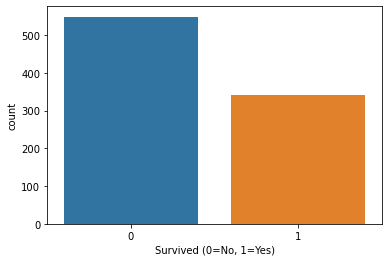

In [195]:
sns.countplot(x="Survived", data=df)
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

In [196]:
# Gender Distribution 

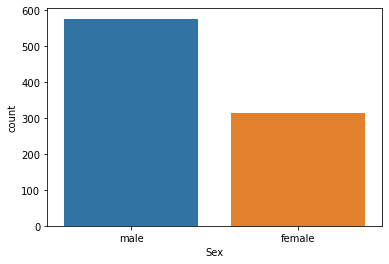

In [197]:
sns.countplot(x='Sex', data=df)
plt.xlabel("Sex")
plt.show()

In [198]:
# Survived Distribution based on Gender

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

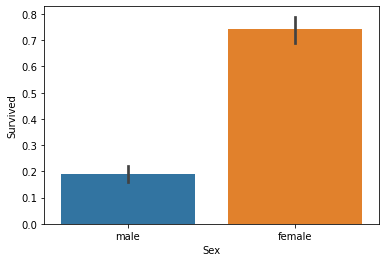

In [199]:
sns.barplot(x='Sex',y='Survived',data = df)

male passengers that are not survived is higher
female passengers that are survived is higher

In [200]:
 # Survived Distribution based on Age 

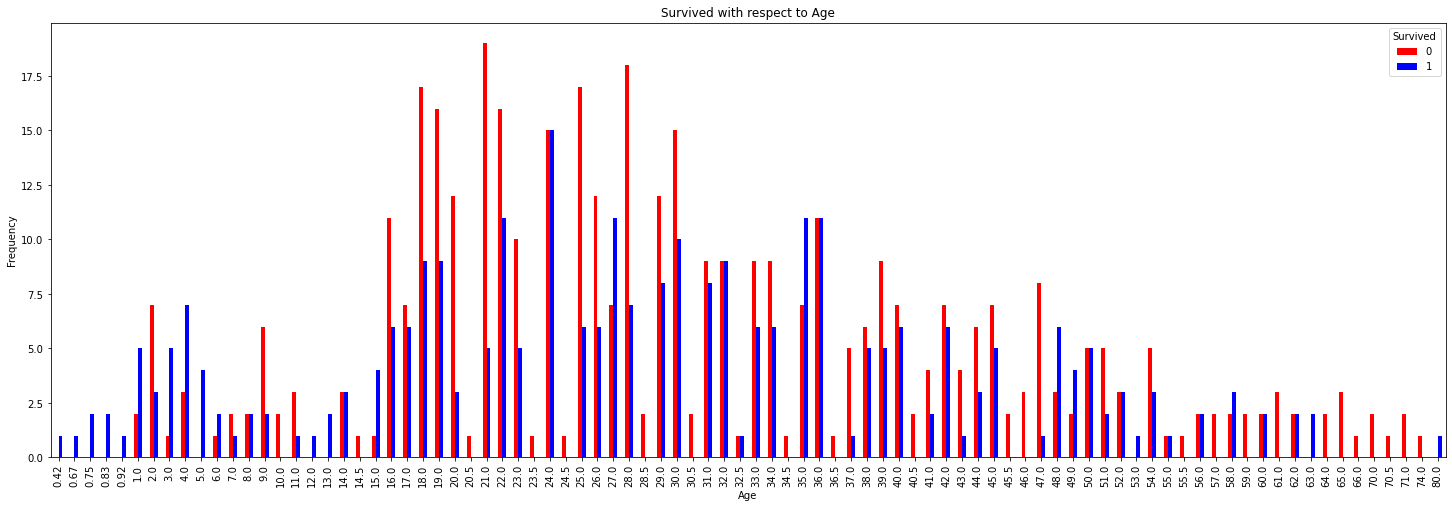

In [201]:
pd.crosstab(df.Age,df.Survived).plot(kind="bar",figsize=(25,8), color=['r','b'])
plt.title('Survived with respect to Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

the majority of not survived passengers are between 16-36

In [202]:
# Passenger Class based on Age

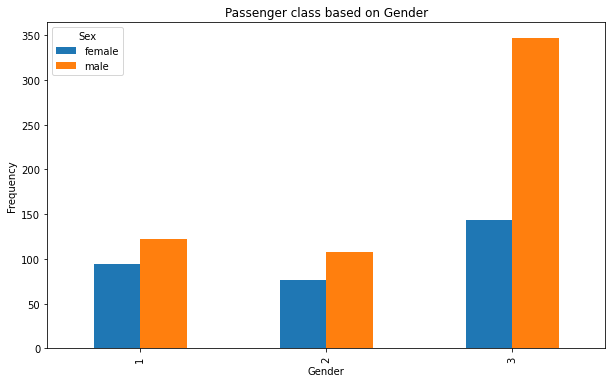

In [203]:
pd.crosstab(df.Pclass,df.Sex).plot(kind="bar",figsize=(10,6))
plt.title('Passenger class based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Max passenger present in 3rd class

 # Dataset Preprocessing 

In [204]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values detected in "Age", "Cabin", and "Embarked"

In [205]:
# Replacing Missing Values

In [206]:
# Age (with mean)
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [207]:
# Distribution of Numerical Value

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

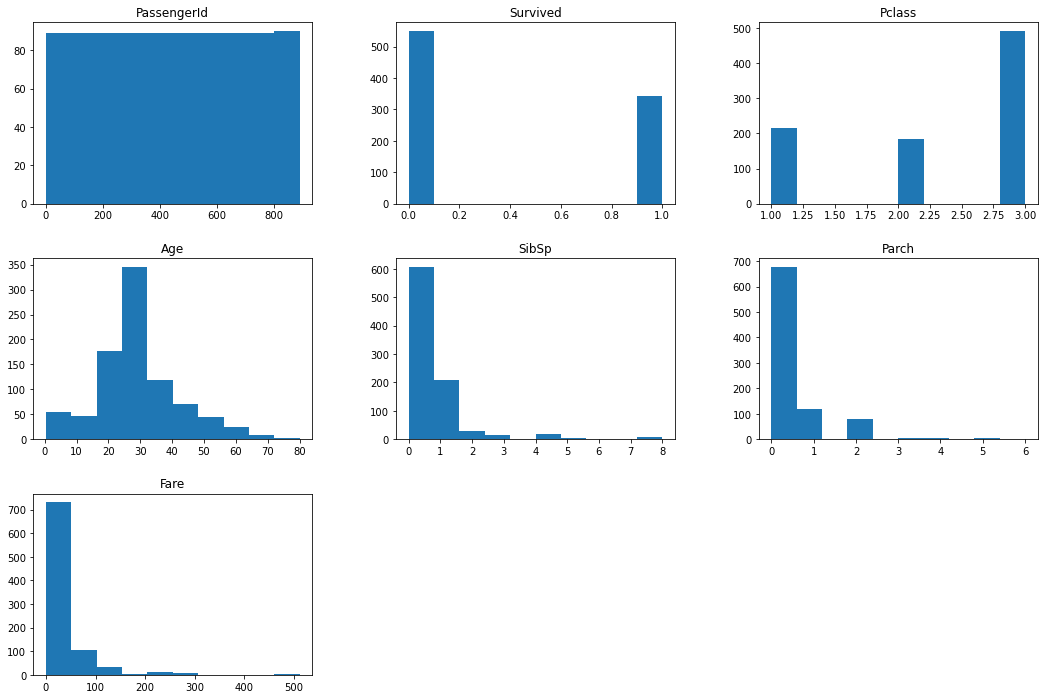

In [208]:
df.hist(grid=False, figsize=(18, 12))

In [209]:
df.skew()

C:\Users\prath\AppData\Local\Temp/ipykernel_1984/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Skewness present in Fare, SibSp, and Parch

In [210]:
# Square root transformation

In [211]:
df.Fare = np.sqrt(df.Fare)

In [212]:
df.SibSp = np.sqrt(df.SibSp)

In [213]:
df.Parch = np.sqrt(df.Parch)

transforming categorical variables into algorithms

In [214]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'])

In [215]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,2.692582,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,8.442944,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,2.815138,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,7.286975,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,2.837252,NaN,0,1,0,0,1,0,0,1


In [216]:
# Dropping Columns 

Cabin, Name, Ticket, and Passenger Id contains unique data so we dorp these columns

In [217]:
df = df.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1)

In [218]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1.0,0.0,2.692582,0,1,0,0,1,0,0,1
1,1,38.0,1.0,0.0,8.442944,1,0,1,0,0,1,0,0
2,1,26.0,0.0,0.0,2.815138,1,0,0,0,1,0,0,1
3,1,35.0,1.0,0.0,7.286975,1,0,0,0,1,1,0,0
4,0,35.0,0.0,0.0,2.837252,0,1,0,0,1,0,0,1


In [219]:
# Splitting the dataset

In [220]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [223]:
# SMOTE Technique

Not survived passengers is more than survived passengers, oversampling is carried out to avoid overfitting

In [224]:
from imblearn.over_sampling import SMOTE
from collections import Counter
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [225]:
print('new dataset shape {}'.format(Counter(y_train)))

new dataset shape Counter({0: 444, 1: 444})


# Model Building 

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [227]:
# LinearRegression

In [228]:
LR = LinearRegression()

In [231]:
LR = LogisticRegression(max_iter=5000)
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
acc_score = accuracy_score(y_pred,y_test)

print('Logistic regression accuracy: {:.2f}%'.format(acc_score*100))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179

[[87 18]
 [16 58]]
Logistic regression accuracy: 81.01%


In [232]:
# Random Forest

In [234]:
RF= RandomForestClassifier(max_leaf_nodes=10)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
Acc_score = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(acc_score*100))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[91 14]
 [21 53]]
Random Forest accuracy is: 81.01%


In [ ]:
# Decision Tree Classifier

In [237]:
DT = DecisionTreeClassifier(max_leaf_nodes=10)
DT.fit(x_train, y_train)

y_pred = DT.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
acc_score = accuracy_score(y_pred,y_test)

print('Decision tree accuracy: {:.2f}%'.format(acc_score*100))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[92 13]
 [22 52]]
Decision tree accuracy: 80.45%


In [ ]:
# KNeighbors Classifier

In [240]:
KN = KNeighborsClassifier(n_neighbors=50)
KN.fit(x_train, y_train)

y_pred = KN.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
acc_score = accuracy_score(y_pred,y_test)

print('K Neighbors Classifier accuracy: {:.2f}%'.format(acc_score*100))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       105
           1       0.71      0.57      0.63        74

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.72      0.73      0.72       179

[[88 17]
 [32 42]]
K Neighbors Classifier accuracy: 72.63%


In [241]:
# Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

In [242]:
from sklearn.model_selection import cross_val_score
src = cross_val_score(LR,x,y,cv = 7)
print(src.mean())

0.7923931383577053


In [243]:
src = cross_val_score(RF,x,y,cv = 7)
print(src.mean())

0.8081060179977503


In [244]:
src = cross_val_score(DT,x,y,cv = 7)
print(src.mean())

0.804705075928009


In [245]:
src = cross_val_score(KN,x,y,cv = 7)
print(src.mean())

0.6869463582677164


Random forest gives the accuracy of 81

# HyperParamter Tunning

In [246]:
RandomForestClassifier()

RandomForestClassifier()

In [247]:
from sklearn.model_selection import GridSearchCV

In [256]:
grid_param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

In [257]:
gsv = GridSearchCV(RandomForestClassifier(),grid_param,cv= 5,scoring = "accuracy")
gsv.fit(x_train_new,y_train_new)
gsv.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

In [258]:
gsv.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=800)

In [259]:
gsv_pred = gsv.best_estimator_.predict(x_test)
accuracy_score(y_test,gsv_pred)

0.8994413407821229

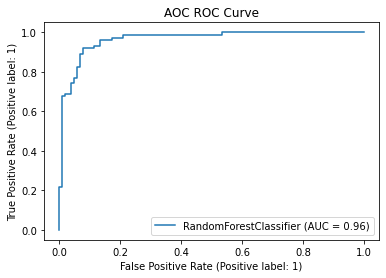

In [260]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gsv.best_estimator_,x_test,y_test)
plt.title("AOC ROC Curve")
plt.show()

We will apply multiple Regression and Classification models for checking the accuracy score but the RandomForestClassifier gives us the best accuracy as compare to another model, so we use RandomForestClassifier.

In [ ]:
import joblib
joblib.dump(gsv.best_estimator_,"Titanic.pkl")